# Introduction to Artificial Neural Network

Birds inspired us to fly, Brain’s architecture inspirad to build an intelligent machine.

ANN : is a Machine Learning model inspired by the networks of biological
neurons found in our brains

ANN are versatile, powerful, and scalable, making them ideal to tackle large and highly complex
Machine Learning tasks : 
- classifying billions of images (e.g., Google Images)
- powering speech recognition services (e.g., Apple’s Siri)
- recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube)
- learning to beat the world champion at the game of Go (DeepMind’s AlphaGo).


## From Biological to Artificial Neurons

ANNs have been around for quite a while: they were first introduced back in 1943, McCulloch and Pitts presented a simplified computational model of how biological neurons might
work together in animal brains to perform complex computations using
propositional logic.

In the early 1980s, new architectures were invented and better training techniques were developed, sparking a revival of interest in *connectionism*. But progress was slow, and by the 1990s other powerful Machine Learning techniques were invented, such as *Support Vector Machines* These techniques seemed to offer better results and stronger theoretical foundations than ANNs, so once again the study of neural networks was put on hold.

The tremendous increase in computing power since the 1990s now
makes it possible to train large neural networks in a reasonable
amount of time  and ANNs frequently outperform other ML techniques on very
large and complex problems.

### Biological Neurons
Biological neurons produce short electrical impulses called action potentials (APs, or just signals) which travel along the axons and make the
synapses release chemical signals called neurotransmitters. When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses. (some are inhibit), each neuron typically connected to thousands of other neurons.

<img src="neuron_cell.PNG" width=500px />

### Logical Computations with Neurons
McCulloch and Pitts proposed a very simple model also known as an *artificial neuron* : it has one or more binary(on/off) inputs and one binary output. the neuron activate when output has value more than a certain numbers of inputs are active.

just simple like : and, or, not logic
- and : outputs activate when input1 and input2 activate
- or : outputs activate when input1 or input2 activate

### The Perceptron

is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt, slightly different from artificial neuron called a *threshold logic unit (TLU)* 

instead of binary on/off values, each input connect with a **weight** then sum of each input (Z = w1x1 + w2x2 + ... = wx.T), then applied step function to sum and outputs 

the result : $$h_w(X) = step(z)$$

the most common step function is the *Heaviside step juction* 

- heaviside(z) = 0 if z<0 else 1 (use threshold = 0)

computing the ouputs of a fully connected layer

$$h_w,_b(X) = Φ(XW + b)$$

- X is matrix of inputs features. 1 row per instance and 1 column per feature. ex ;(0.2, 0.3, 0.5, 1.2) of 1 instance have 4 feature.
- W is a Weight ; has 1 row per inputs neuron
- b is bias connect with Weight 
- the function Φ is called the *activation function* (step function in TLU)

Perceptron learning rule (weight upfdate)
- $$W_i,_j(nextstep) = W_i,_j + a(y_i - y_p)X_i$$

a is a learning rate

the decision boundary of each output neuron is linear, so Perceptrons are incapable with complex pattern (just like Logistic Regression Classifier)

However, if traing instaces ate linearly seperable this algorithm would converge to a solution. This is called the *Perceptron Convergence Theorem*.

for example with iris datasets.

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

Iris = load_iris()
X = Iris['data'][:, (2,3)] # petal length and petal width
y = (Iris['target'] == 0)*1 # True or False to 1 or 0 (Iris setosa?)
X.shape, y.shape, X[:5], y[:5]

((150, 2),
 (150,),
 array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2]]),
 array([1, 1, 1, 1, 1]))

In [9]:
Perceptron_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
Perceptron_clf.fit(X, y)

y_pred = Perceptron_clf.predict([[2, 0.5]])
y_pred

array([1])

> Perceptrons do not
output a class probability; rather, they make predictions based on a hard
threshold.

<img src="percepton_sep.png" />

### The Multilayer Perceptron and Backpropagation

An MLP is composed of one(passthrough) input layer -> hidden layers -> output layer. 

the layer close to input layer called the *lower layers* and close to output layer called *upper layers* every layer includes a bias and fully connected to the next layer (except the output lalyer). 

For many yeras researchers struggled to find a way to train MLPs, but in 1986, 6, David Rumelhart, Geoffrey Hinton, and Ronald Williams, introduced the *backpropagation* in short it's *Gradient Descent*. it can find out how each connection weight and each bias term should be tweaked in order to reduce the error.

each instance forward to the layers and layers until the output is called *forward pass*, next measures the network's output error(use a loss function) this done by applying the *chain rule* then find of these error contributions until the input layer is called *backward pass*. finally use a Gradient Descent to tweak all the connection weights in the network.

Activation function : is a step function have many of these to use; for example : sigmoid, relu, tanh

use Activation fuction for non-linear problem (each activation function have their own duty).

In [48]:
def sigmoid(z): # or Logistic
    return 1 / (1 + np.exp(-z))
def relu(z):
    return np.maximum(0, z)
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

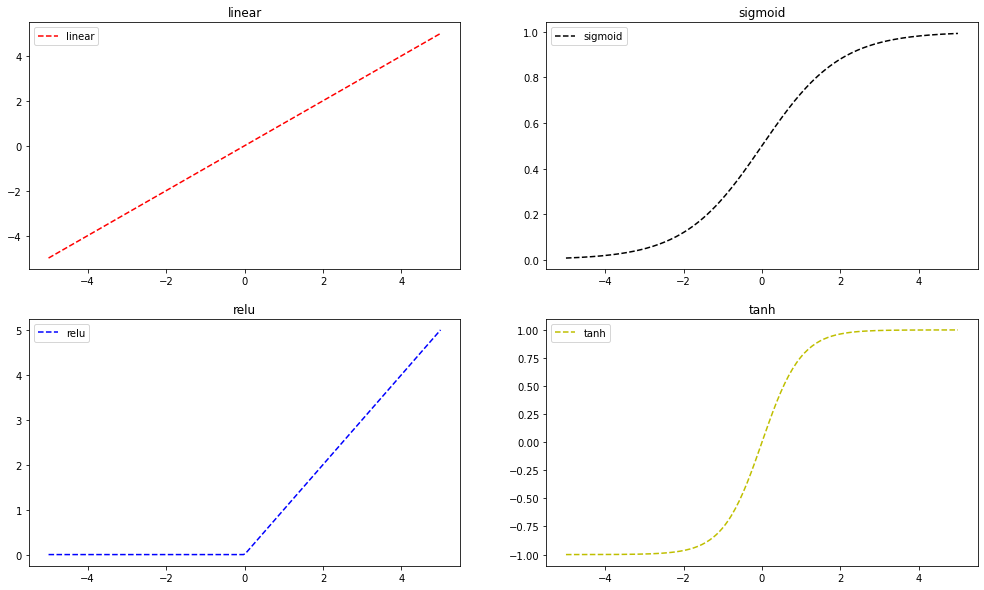

In [52]:
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)
plt.figure(figsize=(17,10))
plt.subplot(221)
plt.plot(z, z,'r--', label='linear')
plt.title('linear')
plt.legend()

plt.subplot(222)
plt.plot(z, sigmoid(z), 'k--', label='sigmoid')
plt.title('sigmoid')
plt.legend()

plt.subplot(223)
plt.plot(z, relu(z), 'b--', label='relu')
plt.title('relu')
plt.legend()

plt.subplot(224)
plt.plot(z, tanh(z), 'y--', label='tanh')
plt.title('tanh')
plt.legend();

**Regression problem** : output layer usually not use activtion function or if you want only positive value use Relu(can use softplus which is smooth varint of Relu), loss fuction typically MSE but if have a lot of outlier use MAE, Alternatively you can use the Huber loss(combination of both).

**Classification problem** : binary(just 1 output layers) use sigmiod activation or multiclass(number of class layers) use softmax activation in ouput layers.

of both loss use cross-entropy (also called the log loss). 

## Building a Model
functional API

In [54]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [58]:
X_train.shape, y_train.shape

((11610, 8), (11610,))

In [73]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

input_A = layers.Input(shape=[5], name='wide_input') # 5 feature to train in this input layer
input_B = layers.Input(shape=[6], name='deep_input') # 6 feature to train in this input layer
x = layers.Dense(units=30, activation='relu')(input_B) # 1st hidden layer of B
x = layers.Dense(units=30, activation='relu')(x) # 2nd hidden layer of B
concat = layers.concatenate([input_A, input_B]) # concat A and B
output = layers.Dense(1, name='output')(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 concatenate_4 (Concatenate)    (None, 11)           0           ['wide_input[0][0]',             
                                                                  'deep_input[0][0]']             
                                                                                                  
 output (Dense)                 (None, 1)            12          ['concatenate_4[0][0]']    

<img src="widedeep.png" width=300px/>

In [74]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] # 5features and 6 features
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:] 
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

In [75]:
model.compile(loss='mse', optimizer='adam')
history = model.fit((X_train_A, X_train_B), y_train, epochs=400, validation_data=((X_valid_A, X_valid_B), y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

363/363 [==============================] - 0s 1ms/step - loss: 0.5283 - val_loss: 0.9066
Epoch 27/400
363/363 [==============================] - 0s 1ms/step - loss: 0.5269 - val_loss: 0.9591
Epoch 28/400
363/363 [==============================] - 0s 884us/step - loss: 0.5274 - val_loss: 1.0295
Epoch 29/400
363/363 [==============================] - 0s 980us/step - loss: 0.5287 - val_loss: 1.0318
Epoch 30/400
363/363 [==============================] - 0s 999us/step - loss: 0.5269 - val_loss: 1.0506


In [80]:
model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 863us/step - loss: 0.5432


0.543224036693573

In [84]:
y_pred = model.predict((X_test_A, X_test_B))
y_pred.shape

(5160, 1)

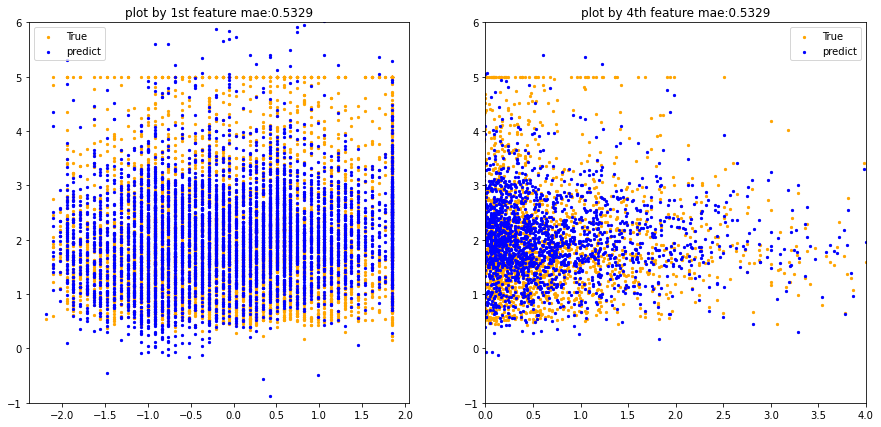

In [139]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.scatter(X_test[:,1], y_test, s=5, c='orange') # plot by 1st features
plt.scatter(X_test[:,1], y_pred, s=5, c='blue')
mae = np.mean(np.abs(y_test.reshape(-1,1)-y_pred)) # same shape
plt.title(f'plot by 1st feature mae:{mae:.4f}')
plt.legend(['True', 'predict'])
plt.ylim([-1,6])

plt.subplot(122)
plt.scatter(X_test[:,4], y_test, s=5, c='orange') # plot by 4th features
plt.scatter(X_test[:,4], y_pred, s=5, c='blue')
mae = np.mean(np.abs(y_test.reshape(-1,1)-y_pred)) # same shape
plt.title(f'plot by 4th feature mae:{mae:.4f}')
plt.legend(['True', 'predict'])
plt.ylim([-1,6])
plt.xlim([0,4]);

## Hyperparameter Tuning

In [149]:
def build_model(n_hidden=1, n_neuron=4, learning_rate=1e-3, input_shape=8) :
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_shape,))) #input
    for layer in range(n_hidden) : # hidden
        model.add(layers.Dense(n_neuron, activation='relu'))
    model.add(layers.Dense(1)) # output
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

callback = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
params = {
    'n_hidden': [1,2,3,4],
    'n_neuron' : np.arange(1,128,7).tolist(),
    'learning_rate' : np.linspace(5e-4, 1e-3).tolist()
}

rnd_search_cv = RandomizedSearchCV(keras_reg, params, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=callback)

In [162]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_estimator_)

{'n_neuron': 127, 'n_hidden': 3, 'learning_rate': 0.0009693877551020408}


Scikit learn to Tensorflow

In [164]:
model = rnd_search_cv.best_estimator_.model
model

In [165]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 893us/step - loss: 0.2716


0.27161315083503723

In [174]:
y_pred = model.predict(X_test)
np.mean(np.square(y_test.reshape(-1,1) - y_pred))

0.2716131670090634

In [175]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

i think this callbacks is good for now(or use with ReduceLRonPlateau : a callback to reduce the learning rate when a metric has stopped improving. ; new_lr = lr * factor) 